In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Fase 1

In [4]:
# se carga el conjunto de datos de sklearn, despues se convierte en data frame para manipularlo mejor
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# con target se refiere a si es maligno(1) o beningo (0)
breast_cancer_df['target'] = breast_cancer.target
# obtenemos las primeras 5 filas (tumores) y en las columnas notamos sus características
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Fase 2. Extracción y Limpieza de Datos
**Se revisan los valores nulos o faltantes.**
**Se verifica la distribución de las clases de la variable objetivo para entender si el dataset está balanceado.**

In [7]:
# Encontrar valores nulos
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
# Valores dulpicados
breast_cancer_df.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [11]:
# Target
breast_cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## Fase 3. Análisis de datos


**matriz de correlación para identificar qué tan relacionadas están las variables entre sí. 
Esto ayuda a identificar redundancias o características que no aportan mucho al modelo.**


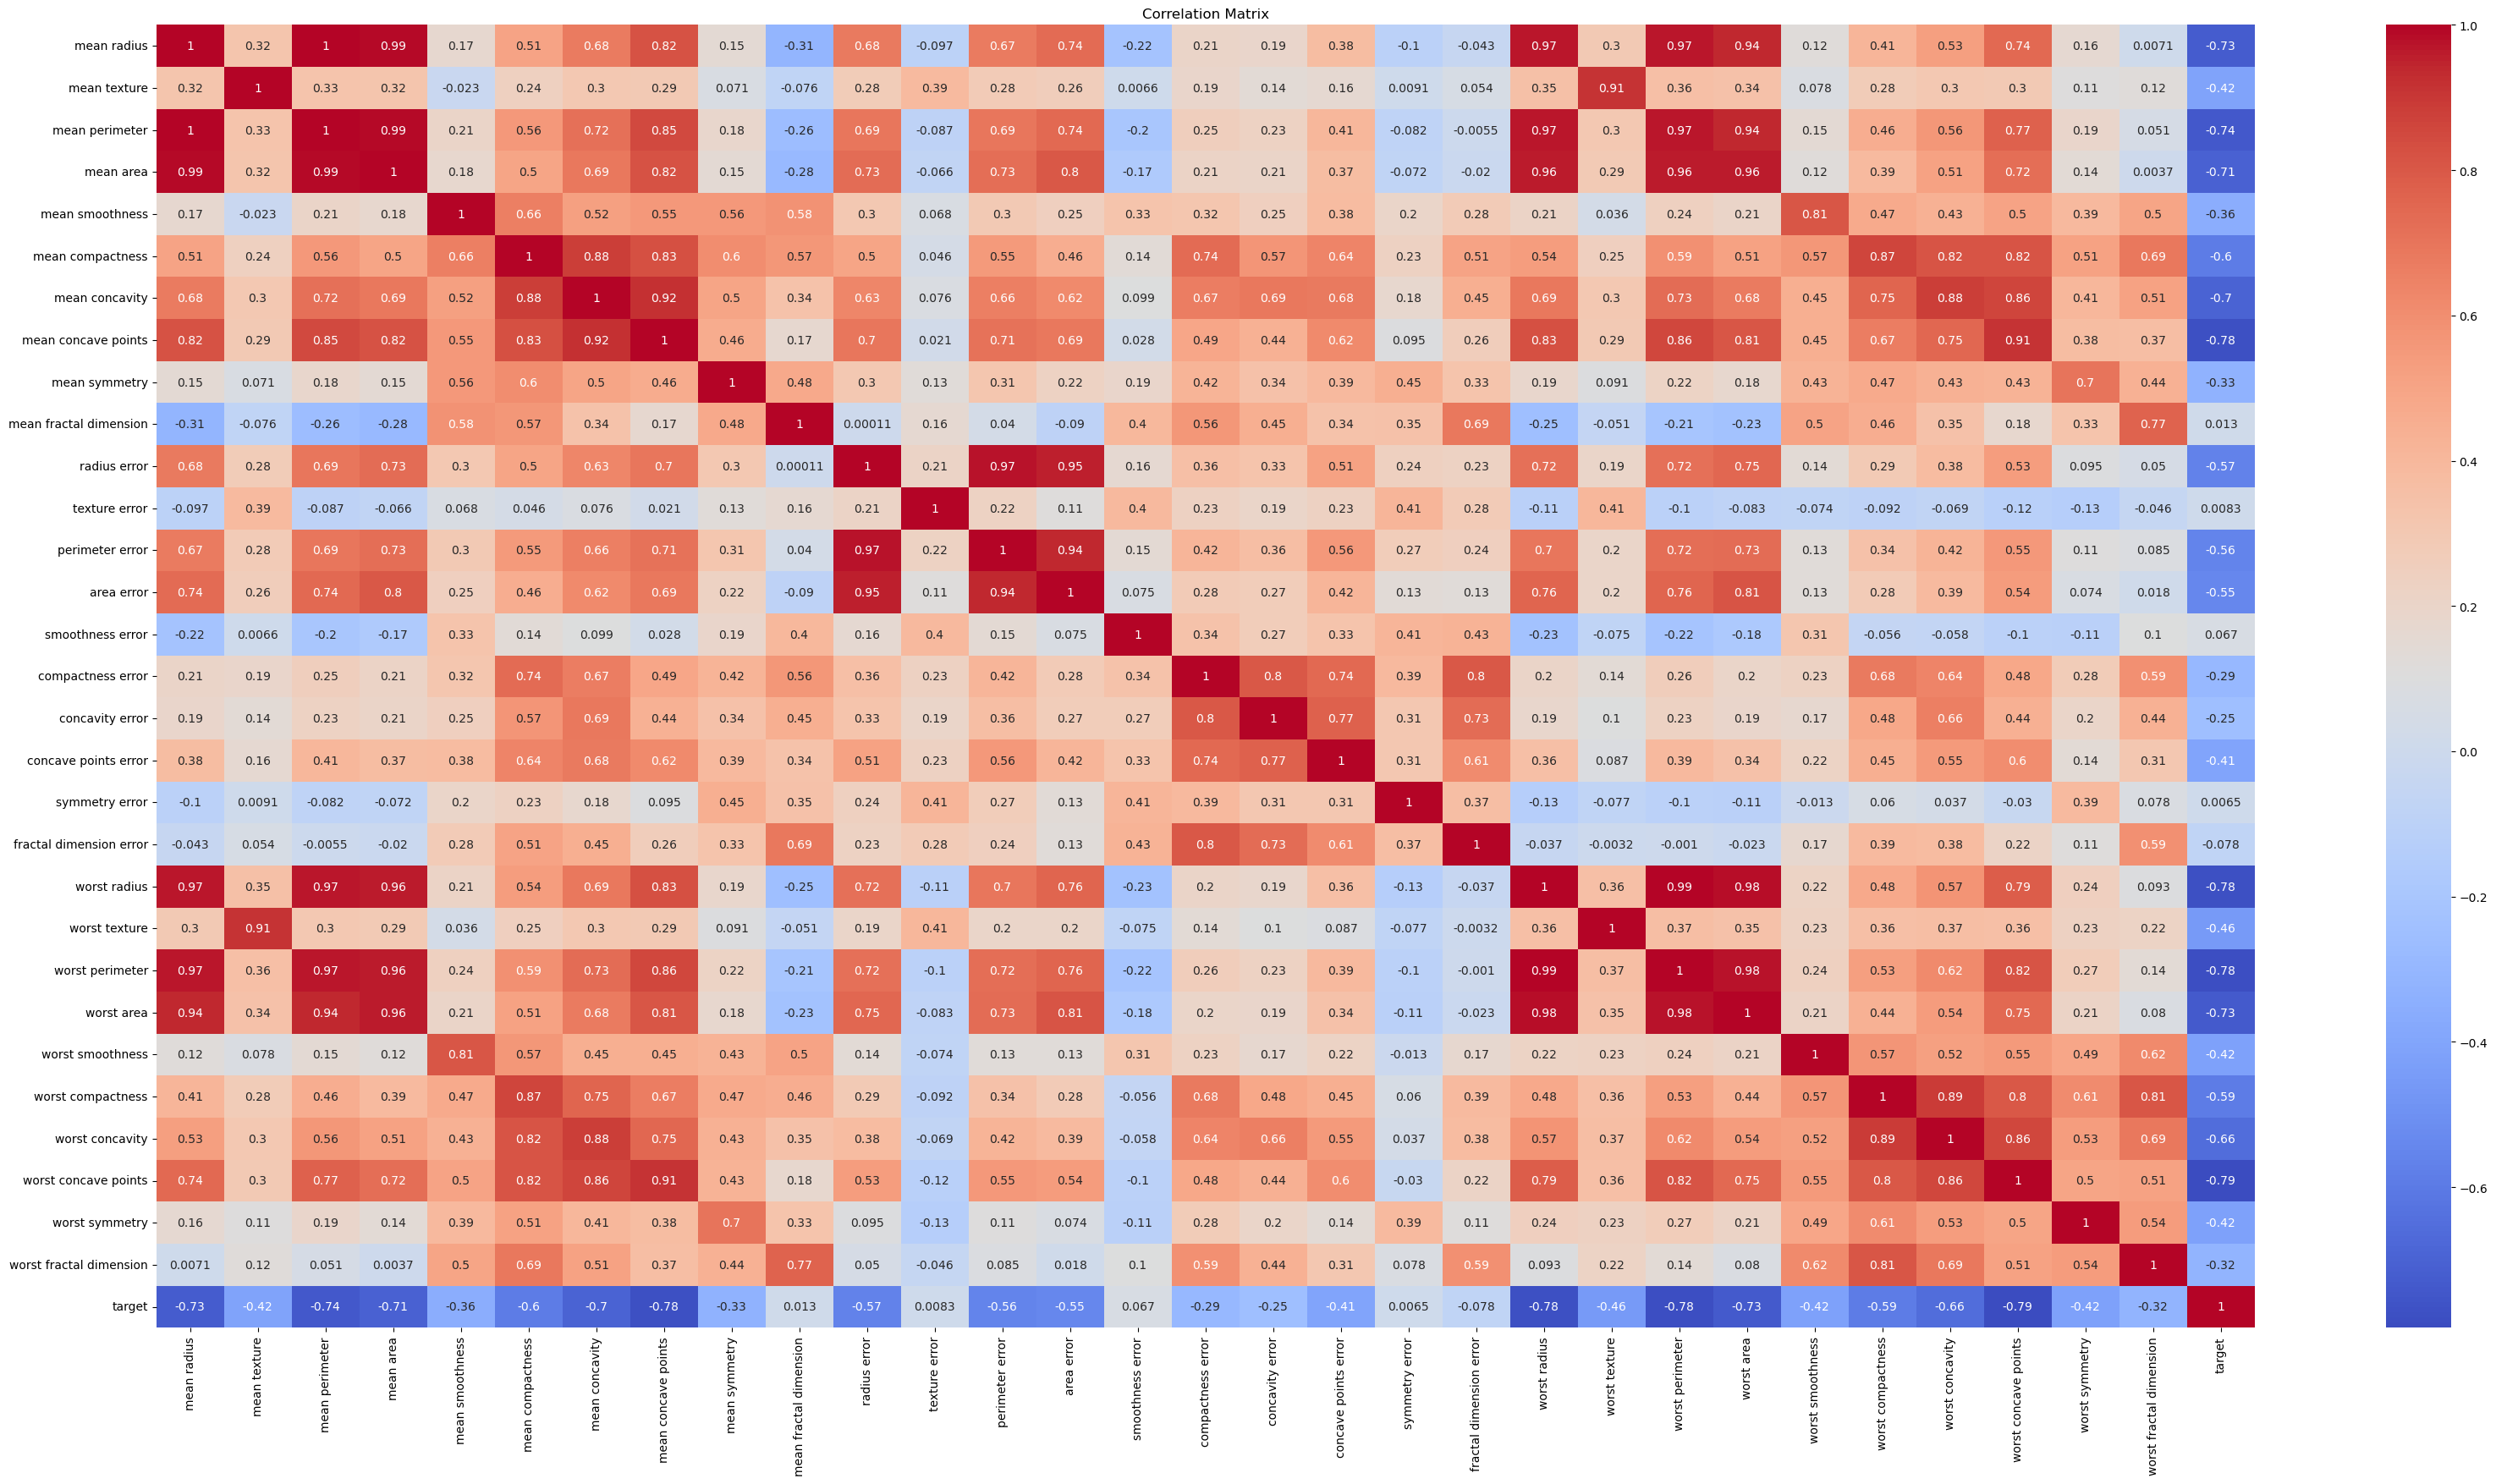

In [13]:
# Matriz de correlación
corr_mat = breast_cancer_df.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(corr_mat, )
plt.title('Correlation Matrix')
plt.show()

**al ojacho se ve lol entoncees los que estan mas cercanos al 0 indican poca relacion i guess, los cercanos a -1 y 1 son los buenos los que si tiene rela**

### se sacan histogramas para cada caracretistica, por ejemplo en el radio se observa que los tumores malignos tienen mas radio promedio q los buenos

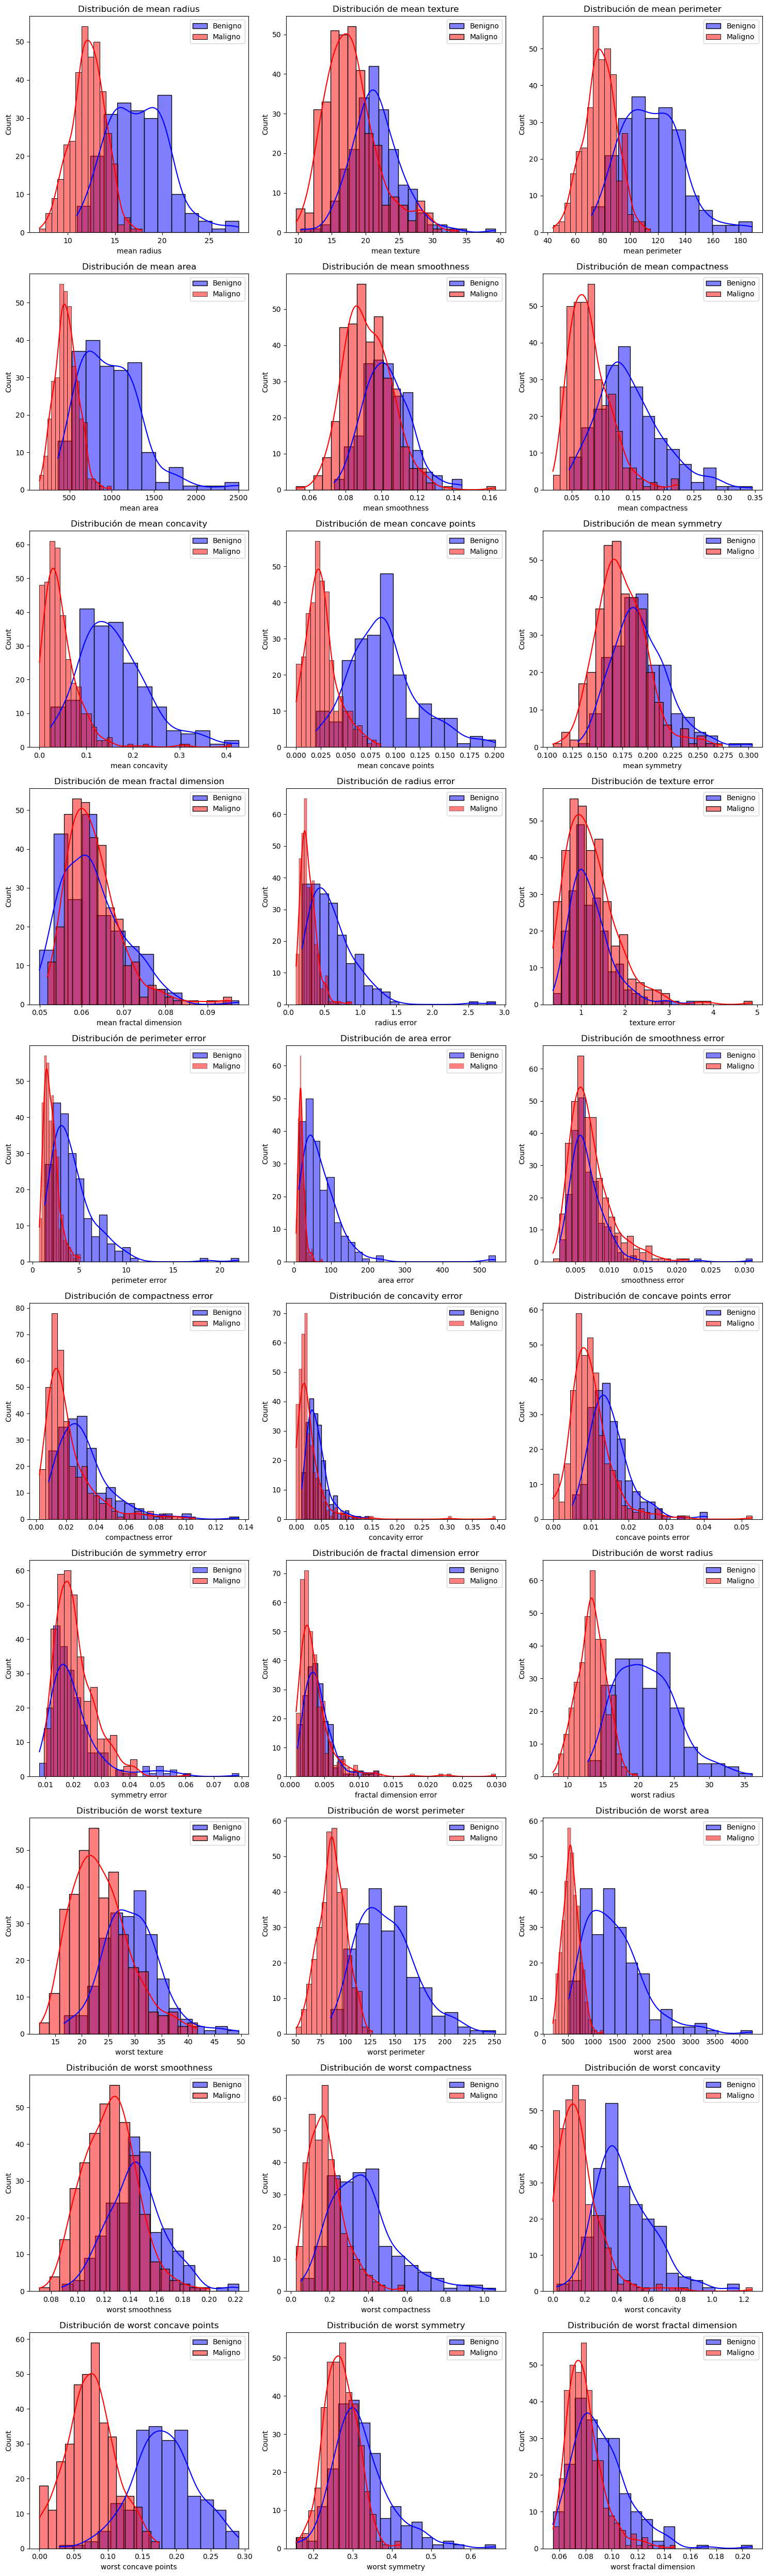

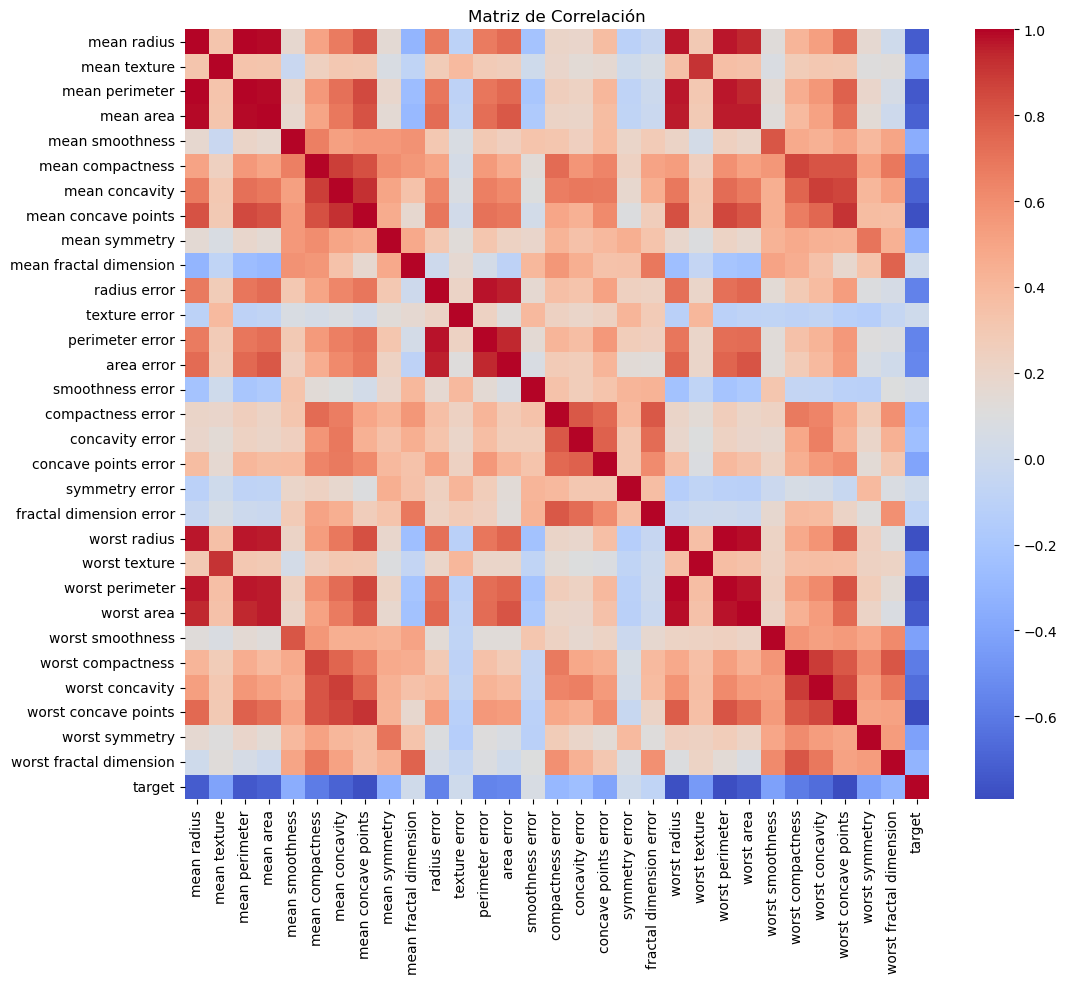

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el número de filas y columnas para la cuadrícula
num_features = len(breast_cancer.feature_names)
num_cols = 3  # Número de columnas deseado
num_rows = int(np.ceil(num_features / num_cols)) # Calcula el número de filas necesario

# Crear la cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

# Visualización de la distribución de las características
for i, feature in enumerate(breast_cancer.feature_names):
    sns.histplot(breast_cancer_df[breast_cancer_df['target'] == 0][feature], color='blue', label='Benigno', kde=True, ax=axes[i])
    sns.histplot(breast_cancer_df[breast_cancer_df['target'] == 1][feature], color='red', label='Maligno', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature}')
    axes[i].legend()

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

# Correlación entre variables (sin cambios)
plt.figure(figsize=(12, 10))
sns.heatmap(breast_cancer_df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show() 

In [8]:
drop_columns = ["mean radius", "mean perimeter", "radius error", "perimeter error", "worst radius", "worst perimeter", "mean concavity", "worst concavity"]
breast_cancer_df.drop(columns=drop_columns, inplace=True)

# Drop "mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"
breast_cancer_df.drop(columns=["mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"], inplace=True)

# y (variable objetivo): Contiene los valores de target, que indican si el tumor es maligno (1) o benigno (0).
#X (características): Contiene las columnas restantes tras las eliminaciones. 
#Estas son las características que el modelo utilizará para aprender.

y = breast_cancer_df["target"]
X = breast_cancer_df.drop(columns="target")

## Fase 4. Entrenamiento del modelo con validación cruzada

##### Entrenamiento (X_train, y_train): Contiene el 70% de los datos, utilizado para entrenar el modelo.
##### Prueba (X_test, y_test): Contiene el 30% restante, utilizado para evaluar el desempeño del modelo con datos nuevos no vistos durante el entrenamiento.

In [19]:
X = breast_cancer_df.drop(columns="target")
y = breast_cancer_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9298245614035088

#### evaluar el rendimiento del modelo y visualizar los resultados de la predicción mediante la matriz de confusión y el reporte de clasificación. 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      0.98      0.99       103

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



<Axes: >

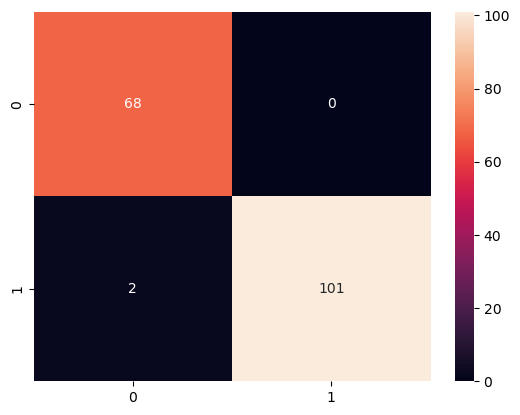

In [71]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [20]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())

[0.9122807  0.9122807  0.95614035 0.92105263 0.9380531 ]
0.9279614966620089


In [21]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='recall')

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9678367346938774
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix (Best Model):


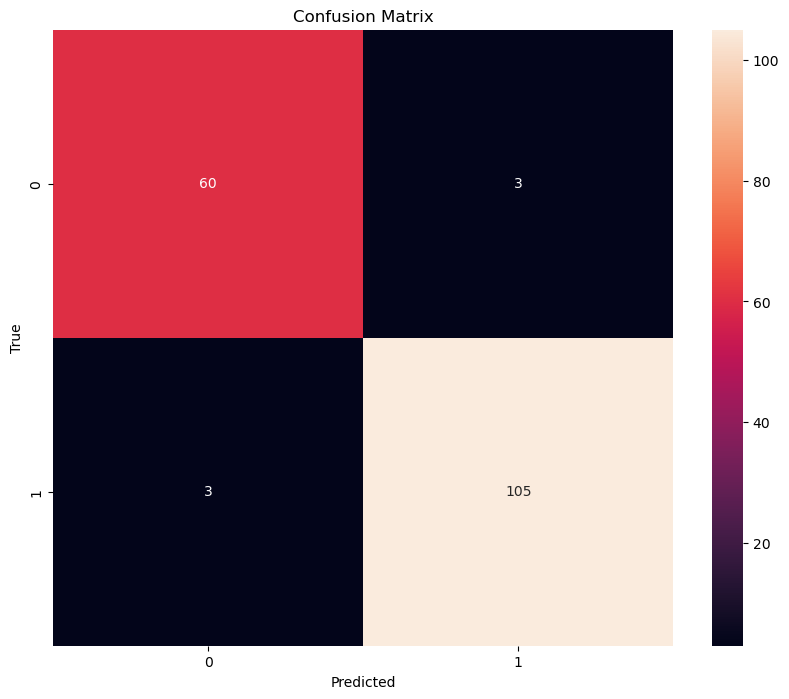

Mean Cross-Validation Score (Best Model): 0.96 +/- 0.02


In [22]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=y.unique().astype(str)))
print("Confusion Matrix (Best Model):")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Cross-validation
scores_best = cross_val_score(best_tree, X, y, cv=5, scoring='f1')
print(f"Mean Cross-Validation Score (Best Model): {np.mean(scores_best):.2f} +/- {np.std(scores_best):.2f}")

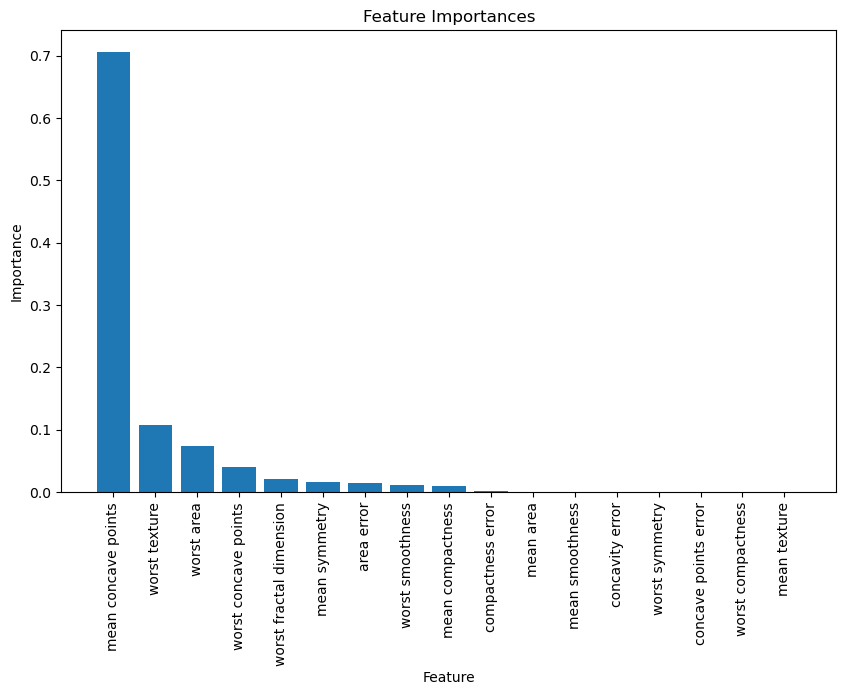

In [23]:
# Plot feature_importances_
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [24]:
underClass = breast_cancer_df["target"].value_counts().idxmin()
underClass_size = breast_cancer_df["target"].value_counts().min()
df_overClass = breast_cancer_df[breast_cancer_df["target"] != underClass].sample(underClass_size, random_state=42)
df_underClass = breast_cancer_df[breast_cancer_df["target"] == underClass]
df_balanced = pd.concat([df_overClass, df_underClass])
df_balanced["target"].value_counts()

target
1    212
0    212
Name: count, dtype: int64

In [25]:
X = df_balanced.drop(columns="target")
y = df_balanced["target"]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

model.score(X_test_balanced, y_test_balanced)

0.921875

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.944746835443038
Classification Report (Best Model):
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        63
           0       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix (Best Model):


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


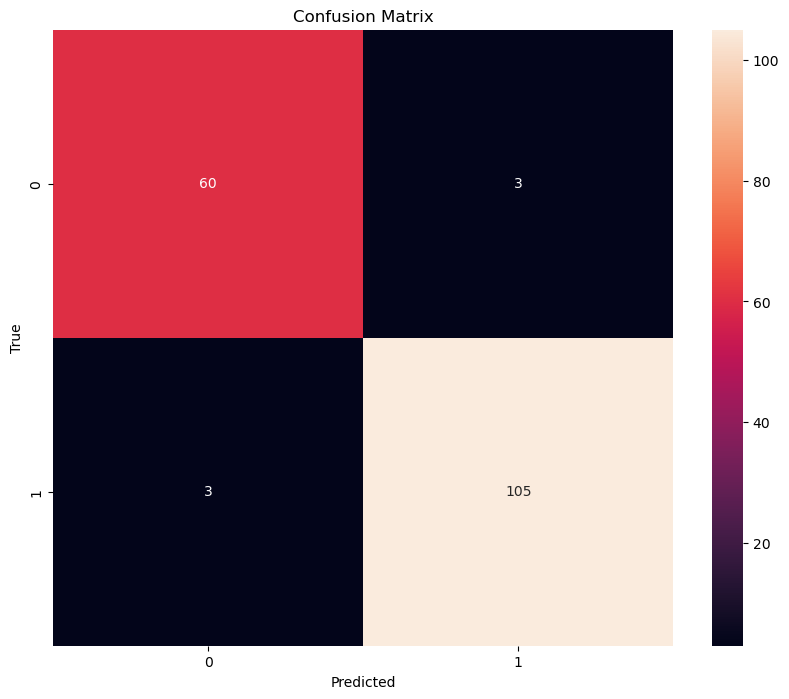

Mean Cross-Validation Score (Best Model): 0.90 +/- 0.05


In [26]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=y.unique().astype(str)))
print("Confusion Matrix (Best Model):")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Cross-validation
scores_best = cross_val_score(best_tree, X, y, cv=5, scoring='recall')
print(f"Mean Cross-Validation Score (Best Model): {np.mean(scores_best):.2f} +/- {np.std(scores_best):.2f}")

In [27]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=y.unique().astype(str)))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.98      0.95      0.97        63
           0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [28]:
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='recall')
print(scores)
print(scores.mean())

[0.93023256 0.97674419 0.95238095 0.9047619  0.97619048]
0.9480620155038759


<Axes: >

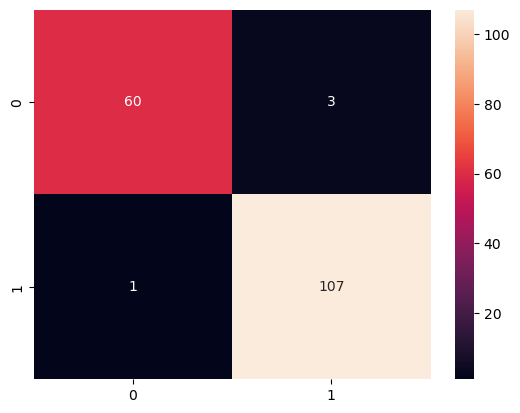

In [29]:
confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation Score: 0.9572468354430381
Classification Report (Best Model):
              precision    recall  f1-score   support

           1       0.98      0.95      0.97        63
           0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix (Best Model):


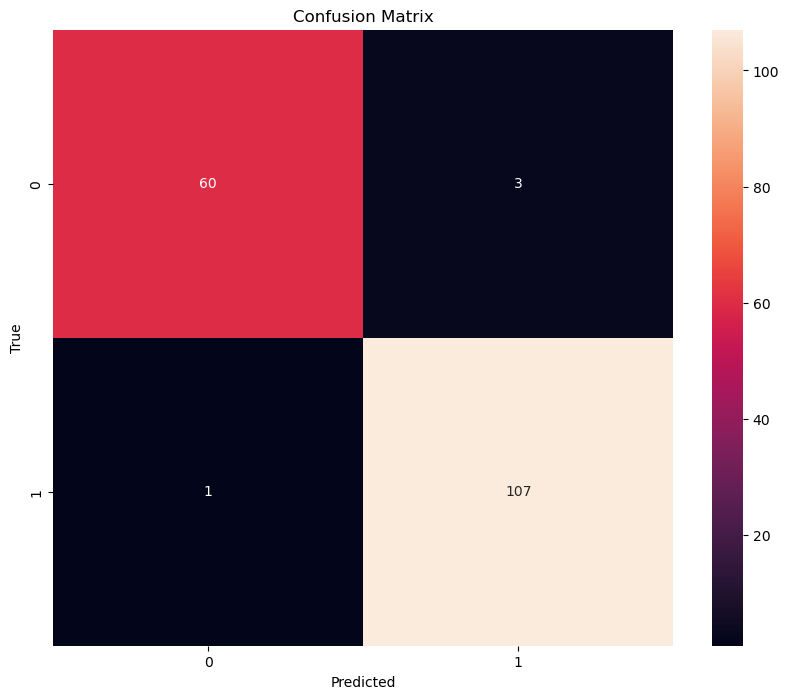

Mean Cross-Validation Score (Best Model): 0.95 +/- 0.02


In [30]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= 5, n_jobs=-1, verbose=3)
rf_grid.fit(X_train, y_train)

best_params = rf_grid.best_params_
best_score = rf_grid.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
best_rf = rf_grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=y.unique().astype(str)))
print("Confusion Matrix (Best Model):")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

scores_best = cross_val_score(best_rf, X, y, cv=5, scoring='recall')
print(f"Mean Cross-Validation Score (Best Model): {np.mean(scores_best):.2f} +/- {np.std(scores_best):.2f}")

In [33]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf_classifier.predict(X_test)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=y.unique().astype(str)))

NameError: name 'X_train_balanced' is not defined

In [29]:
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='recall')
print(scores)
print(scores.mean())

[0.91549296 0.98591549 0.98611111 1.         0.98591549]
0.9746870109546165


In [31]:
confusion_matrix(y_test_balanced, y_pred_rf)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

NameError: name 'y_test_balanced' is not defined

In [ ]:
print("hola")

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)

In [50]:
dt_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

Confusion Matrix Votes DT:


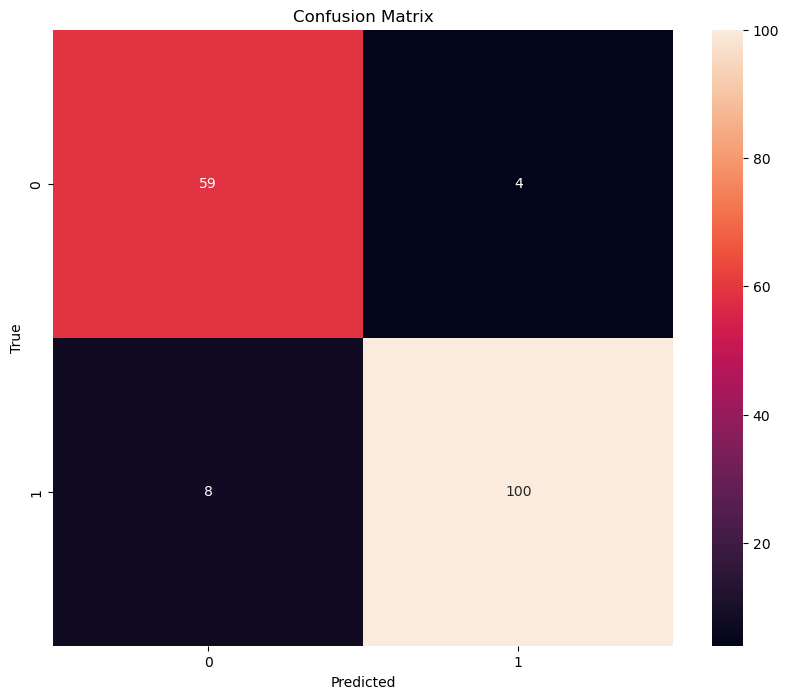

votes misteriosos:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.96      0.93      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [52]:
print("Confusion Matrix Votes DT:")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("votes misteriosos:")
print(classification_report(y_test, dt_pred, target_names=y.unique().astype(str)))

In [54]:
from sklearn.svm import SVC

In [56]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [58]:
svc_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Confusion Matrix Votes SVC:


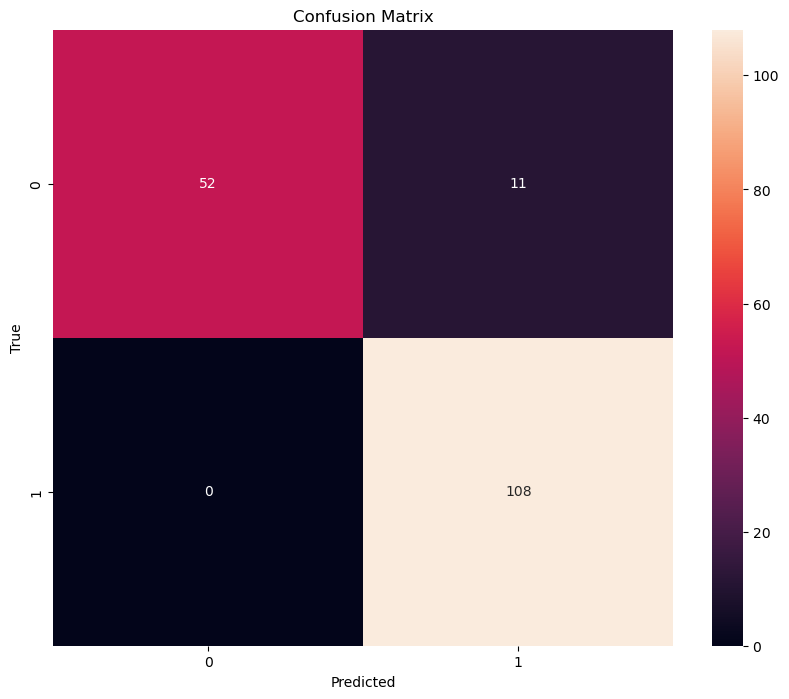

votes misteriosos:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [60]:
print("Confusion Matrix Votes SVC:")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("votes misteriosos:")
print(classification_report(y_test, svc_pred, target_names=y.unique().astype(str)))

In [62]:
from sklearn.neighbors import KNeighborsClassifier 

In [64]:
knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [66]:
knn_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

Confusion Matrix Votes KNN:


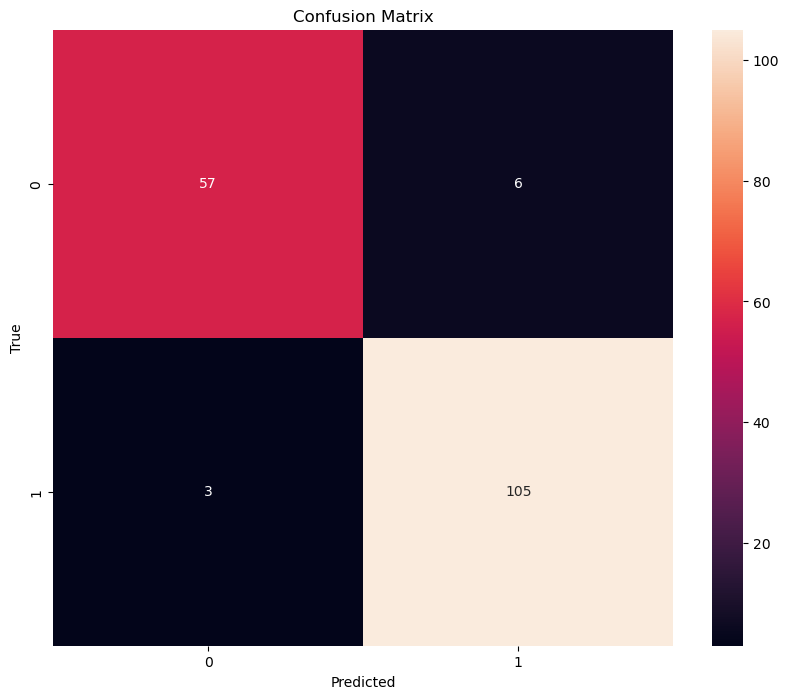

votes misteriosos:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [68]:
print("Confusion Matrix Votes KNN:")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("votes misteriosos:")
print(classification_report(y_test, knn_pred, target_names=y.unique().astype(str)))

In [70]:
votes = knn_pred + svc_pred + dt_pred

In [72]:
for i in range(len(votes)):
    if votes[i] / 3 < 0.5:
        votes[i] = 0
    else:
        votes[i] = 1

votes

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

Confusion Matrix Votes:


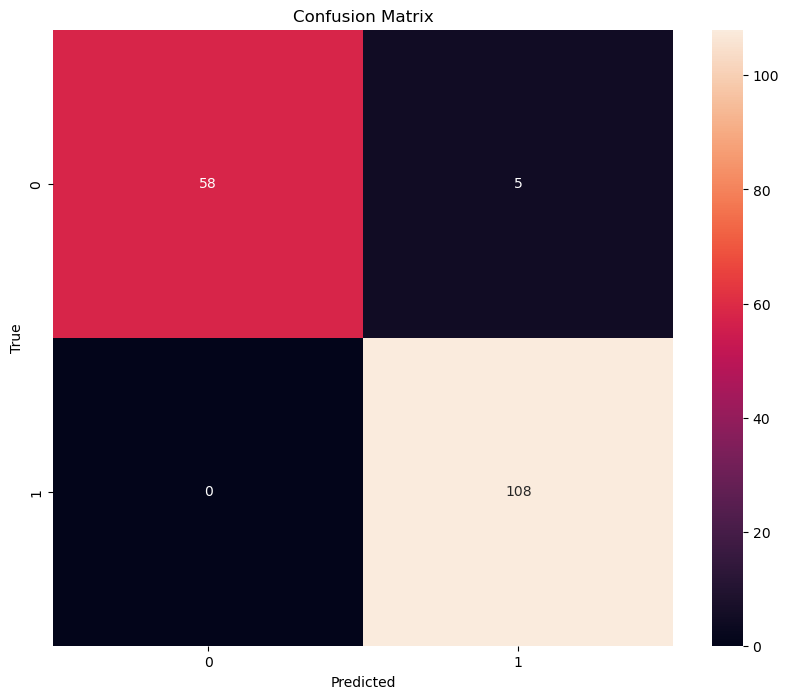

votes misteriosos:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        63
           1       0.96      1.00      0.98       108

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [74]:
print("Confusion Matrix Votes:")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, votes), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("votes misteriosos:")
print(classification_report(y_test, votes, target_names=y.unique().astype(str)))

In [77]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
dt_grid_pred = best_tree.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [78]:
dt_grid_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Definir el rango de hiperparámetros para el Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Penalización de margen
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Parámetro gamma (para rbf, poly)
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1)

# Entrenar el Grid Search
grid_search.fit(X_train, y_train)

# Evaluar el modelo con los mejores parámetros en el conjunto de datos
best_model = grid_search.best_estimator_
svc_grid_pred = best_model.predict(X_test)



Fitting 2 folds for each of 60 candidates, totalling 120 fits


In [ ]:
svc_grid_pred

In [ ]:
# Definir el rango de hiperparámetros para el Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],        # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],     # Pesos uniformes o inversamente proporcionales a la distancia
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distancia
    'p': [1, 2]                             # Parámetro para Minkowski (1=manhattan, 2=euclidean)
}

# Crear el modelo base de KNN
knn = KNeighborsClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Entrenar el Grid Search
grid_search.fit(X_train, y_train)

# Evaluar el modelo con los mejores parámetros en el conjunto de datos
best_model = grid_search.best_estimator_
knn_grid_pred = best_model.predict(X_test)

# Resultados del mejor modelo
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión en validación:", grid_search.best_score_)


In [ ]:
knn_grid_pred